<center><h1>Forest Cover Classification</h1></center>
<center><h3>Step 3. Feature Engineering</h3></center>
<center><img src="https://raw.githubusercontent.com/oliver-m-king/forest_cover_classification/main/tree_image.png" alt="Image by Freepik" width="500" height="500"></center>

<h3>The dataset</h3>

This dataset contains observations of a selection of geographic data on 30 x 30 meter cells located in the Roosevelt National Forest of northern Colorado.<br>
There are 581,012 observations of 12 independent variables.<br>
The aim of this project is to develop a model that can accurately predict what type of forest cover a 30m x 30m cell in any area <i>similar</i> to the Roosevelt National Forest has, based on measurements of it's elevation; aspect; distance to water, roads and firepoints; hillshade; and soil type.

Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data.

The dataset was sourced from the <a href="https://archive.ics.uci.edu/ml/datasets/Covertype">Center for Machine Learning and Intelligent Systems, University of California Irvine</a>

<i>Image by Freepik</i>

In [1]:
# Import Libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures

# Define a color list for plotting
color_list = ["#68c4a4", "#ff8c64", "#90a4cc", "#e88cc4", "#ffdc2c", "#a8dc54", "#e8c494"]

# Define directory
data_dir = "C:\\Users\\oliki\\OneDrive\\Forest Cover Classification\\"

<h3>Extract data</h3>

The data is imported from the .pkl outputted in the <i>Extract, Transform, and Load</i> phase.

In [2]:
# Import data
file_name = "transformed_cover_type.pkl"
engineered_df = pd.read_pickle(data_dir + file_name)

print("The dataset has {} rows, and {} columns".format(engineered_df.shape[0], engineered_df.shape[1]))

# Display the first five rows
engineered_df.head()

The dataset has 581012 rows, and 12 columns


,elevation,slope,hor_dist_to_hydro,ver_dist_to_hydro,hor_dist_to_road,hor_dist_to_fire,hillshade_9am,hillshade_noon,hillshade_3pm,aspect,soil_type,cover_type
0,-2.324859,1.666667,-0.340580,1.129032,-0.803330,-0.758847,0.030303,-2.458333,-1.612245,ne,cathedral_2702,ponderosa_pine
1,-2.358757,2.111111,0.869565,1.806452,-0.662916,-0.865007,1.090909,-1.583333,-2.224490,se,cathedral_2702,ponderosa_pine
2,-2.502825,1.333333,0.449275,1.935484,-0.723222,-0.815203,0.212121,-2.041667,-1.469388,ne,cathedral_2702,ponderosa_pine
3,-2.231638,2.222222,-0.028986,1.838710,-0.808281,-0.884010,0.333333,-2.958333,-2.285714,ne,cathedral_2702,ponderosa_pine
4,-2.440678,1.555556,0.532609,2.290323,-0.715122,-0.800786,0.636364,-1.958333,-1.836735,e,cathedral_2702,ponderosa_pine


<h3>Extract climatic zone and geologic zone, and calculate pythagorean distance to water</h3>

In [3]:
# Extract climatic zone and geologic zones
usfc_elu_code_list = engineered_df["soil_type"].str.split("_", expand=True)[1].to_list()

# climatic_zone
engineered_df["climatic_zone"] = [int(i[0]) for i in usfc_elu_code_list]
feature_dict = {1:"lower_montane_dry", 2:"lower_montane", 3:"montane_dry ", 4:"montane", 5:"montane_dry_and_montane",
                6:"montane_and_subalpine", 7:"subalpine", 8:"alpine"}
engineered_df.replace({"climatic_zone": feature_dict}, inplace=True)

# climatic_zone
engineered_df["geologic_zone"] = [int(i[1]) for i in usfc_elu_code_list]
feature_dict = {1:"alluvium", 2:"glacial", 3:"shale ", 4:"sandstone", 5:"mixed_sedimentary",
                6:"unspecified", 7:"igneous_metamorphic", 8:"volcanic"}
engineered_df.replace({"geologic_zone": feature_dict}, inplace=True)

# Drop soil_type
engineered_df.drop(["soil_type"], axis=1, inplace=True)

# Display five random rows
engineered_df.sample(5)

,elevation,slope,hor_dist_to_hydro,ver_dist_to_hydro,hor_dist_to_road,hor_dist_to_fire,hillshade_9am,hillshade_noon,hillshade_3pm,aspect,cover_type,climatic_zone,geologic_zone
514698,-0.110169,1.000000,1.670290,1.693548,-0.230423,0.688073,-0.151515,-1.708333,-0.938776,ne,lodgepole_pine,subalpine,igneous_metamorphic
196813,-0.559322,-0.333333,-0.637681,-0.370968,0.210621,0.055046,0.575758,0.208333,-0.408163,se,lodgepole_pine,subalpine,glacial
199890,0.505650,-1.222222,-0.572464,-0.483871,1.447795,0.758191,0.121212,0.375000,0.122449,e,lodgepole_pine,subalpine,glacial
439621,0.220339,1.000000,0.898551,1.983871,0.441044,0.454784,-1.818182,0.625000,1.571429,w,lodgepole_pine,subalpine,igneous_metamorphic
21755,-1.152542,-0.111111,-0.028986,0.306452,-0.325833,0.062910,0.393939,0.708333,-0.020408,s,ponderosa_pine,lower_montane,igneous_metamorphic


In [4]:
# Pythagorean distance to hydro
def pythagoras(a, b):
    return round(math.sqrt(a**2 + b**2),2)

engineered_df["pythag_dist_to_hydro"] = engineered_df.apply(lambda x: pythagoras(x["hor_dist_to_hydro"], x["ver_dist_to_hydro"]), axis=1)

# Display five random rows
engineered_df.sample(5)

,elevation,slope,hor_dist_to_hydro,ver_dist_to_hydro,hor_dist_to_road,hor_dist_to_fire,hillshade_9am,hillshade_noon,hillshade_3pm,aspect,cover_type,climatic_zone,geologic_zone,pythag_dist_to_hydro
277638,0.367232,-1.000000,-0.246377,-0.209677,2.107111,0.526868,0.212121,0.250000,-0.020408,e,lodgepole_pine,subalpine,igneous_metamorphic,0.32
501348,-0.971751,-0.777778,-0.789855,-0.483871,-0.162016,-0.803408,-0.363636,0.250000,0.428571,nw,spruce_fir,subalpine,igneous_metamorphic,0.93
82483,-0.152542,-0.888889,0.626812,-0.016129,0.769577,1.650066,0.000000,0.166667,0.102041,ne,lodgepole_pine,montane,igneous_metamorphic,0.63
530273,0.610169,0.333333,-0.340580,0.000000,-0.253825,0.518349,0.484848,-0.791667,-0.857143,ne,spruce_fir,subalpine,igneous_metamorphic,0.34
49267,-2.330508,1.888889,-0.572464,-0.370968,-0.316382,-0.710354,-2.818182,-1.000000,1.367347,nw,douglas_fir,montane,igneous_metamorphic,0.68


<h3>Visualise new features</h3>

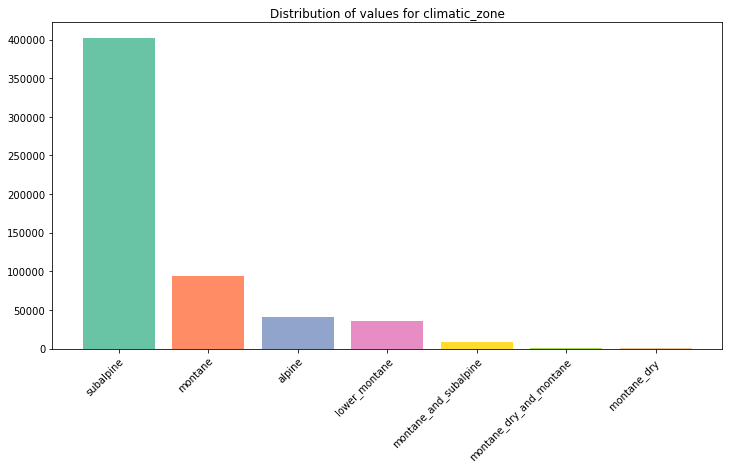

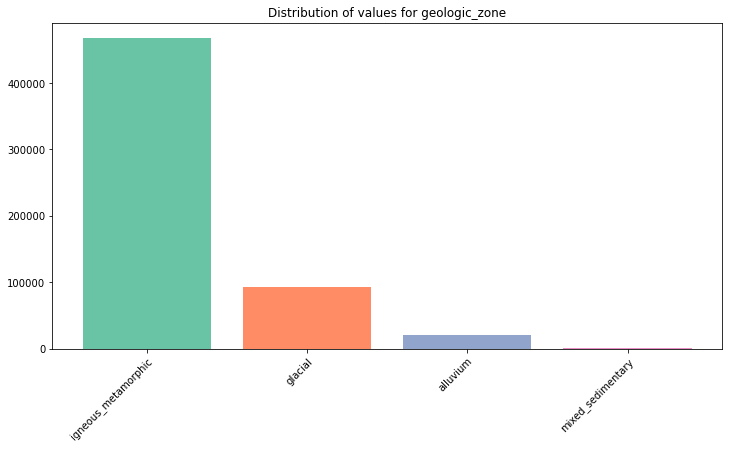

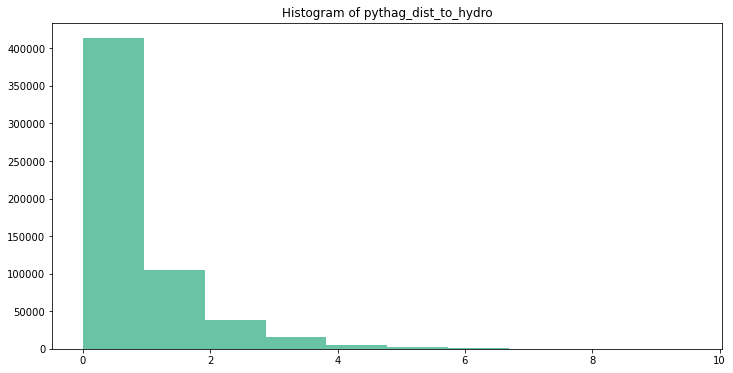

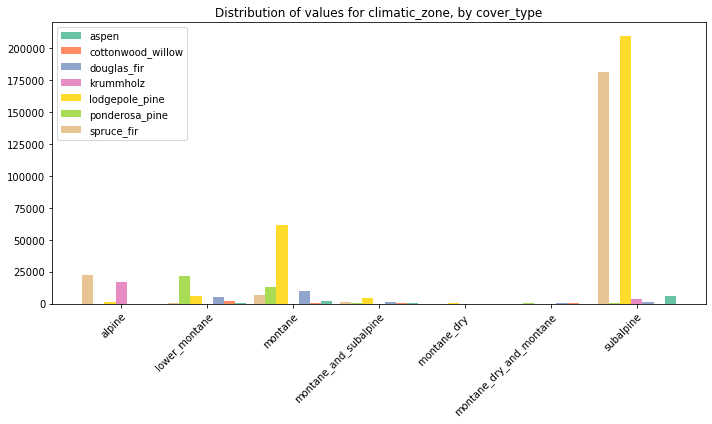

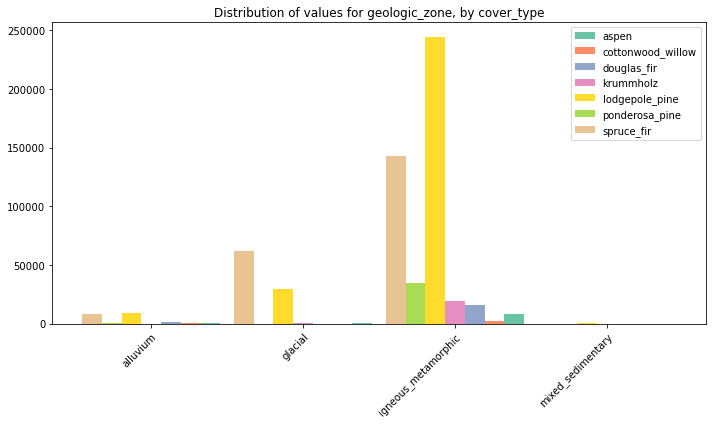

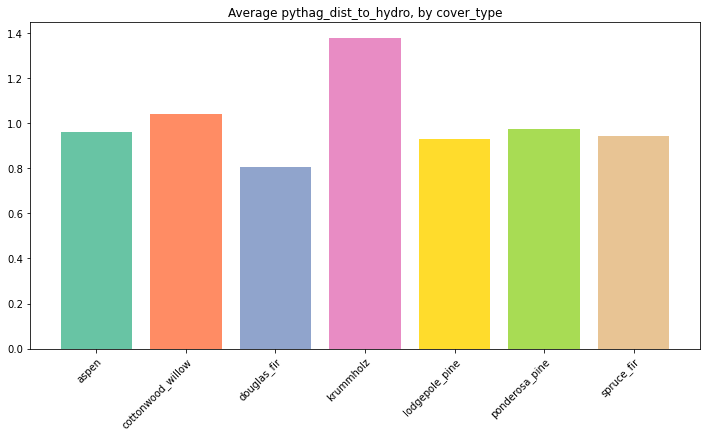

In [5]:
# Interate through features
counter = 0
for feature in ["climatic_zone", "geologic_zone", "pythag_dist_to_hydro"]:

    # Determine feature type: quantitative or qualitative
    if engineered_df[feature].dtype == "float64":
        # Plot histogram
        plt.rcParams["figure.figsize"] = (12,6)
        plt.figsize = (12,6)
        fig = plt.hist(engineered_df[feature], color=color_list[counter % len(color_list)])
        plt.title("Histogram of {}".format(feature))
        plt.show()
        counter += 1
        
    elif engineered_df[feature].dtype == "object":
        # Get list of unique values and the count of each
        chart_df = engineered_df[feature]
        value_counts = chart_df.value_counts()
        values = value_counts.index.values.tolist()
        count = value_counts.values.tolist()

        # Plot bar chart
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.bar(values, count, color=color_list)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        ax.set_title("Distribution of values for {}".format(feature))
        plt.show()

# Plots with respect to cover_type
cover_type_list = sorted(engineered_df["cover_type"].unique().tolist())

for feature in ["climatic_zone", "geologic_zone", "pythag_dist_to_hydro"]:
    
    # Determine feature type: quantitative or qualitative
    if engineered_df[feature].dtype == "float64":
        #Get averages
        avg_list = []
        for cover_type in cover_type_list:
            sub_df = engineered_df[engineered_df["cover_type"] == cover_type]
            avg_list.append(sub_df[feature].mean())
        # Plot bar chart
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.bar(cover_type_list, avg_list, color=color_list)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        ax.set_title("Average {}, by cover_type".format(feature))
        plt.show()
        
    elif engineered_df[feature].dtype == "object":
        # Get list of unique values, and the count that have each for each cover_type
        values = sorted(engineered_df[feature].unique().tolist())
        count_list = []         
        for cover_type in cover_type_list:
            sub_df = engineered_df[engineered_df["cover_type"] == cover_type]
            sub_list = []
            for value in values:
                sub_list.append(sub_df[sub_df[feature] == value].shape[0])
            count_list.append(sub_list)
        # Plot clustered column graphs
        x = np.arange(len(values))
        width = 0.13
        fig, ax = plt.subplots(figsize=(10, 6))
        offset = -3
        for i in range(len(cover_type_list)):
            ax.bar(x - (width * offset), count_list[i], width, label=cover_type_list[i], color=color_list[i])
            offset += 1              
        ax.set_title("Distribution of values for {}, by cover_type".format(feature))
        ax.set_xticks(x)
        ax.set_xticklabels(values)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        ax.legend()
        fig.tight_layout()
        plt.show()

<h3>Correct skew in <i>pythag_dist_to_hydro</i></h3>

In [6]:
# Import boxcox coefficient dataframe to append pythag_dist_to_hydro coeffient to
file_name = "boxcox_coefs.pkl"
boxcox_df = pd.read_pickle(data_dir + file_name)

# Apply boxcox to pythag_dist_to_hydro
engineered_df["pythag_dist_to_hydro"] = engineered_df["pythag_dist_to_hydro"].apply(lambda x: x + 0.01)
boxcox = stats.boxcox(engineered_df["pythag_dist_to_hydro"])
engineered_df["pythag_dist_to_hydro"] = boxcox[0]
boxcox_df.at["pythag_dist_to_hydro", "boxcox_coef"] = boxcox[1]

# Output amended boxcox coefficient dataframe
boxcox_df.to_pickle(data_dir + file_name)

# Display the boxcox coefficient dataframe
boxcox_df

,boxcox_coef
elevation,3.780232
slope,0.480822
hor_dist_to_hydro,0.424901
ver_dist_to_hydro,0.309009
hor_dist_to_road,0.392756
hor_dist_to_fire,0.298091
hillshade_9am,3.880279
hillshade_noon,4.488011
hillshade_3pm,1.172185
pythag_dist_to_hydro,0.065551


<h3>Split X and y, and encode categorical variables</h3>

In [7]:
# Split dataframe into X and y
X = engineered_df.drop(["cover_type"], axis=1, inplace=False)
y = pd.DataFrame(engineered_df["cover_type"])

In [8]:
# One-hot encode categorical features in X
feature_list = X.columns[X.dtypes == "object"].to_list()

# Iterate through list of features that need encoding, encode them with get_dummies and append to engineered_df
for feature in feature_list:
    encoded_df = pd.get_dummies(X[feature], prefix=feature, prefix_sep="-")
    X = pd.concat([X, encoded_df], axis=1)

# Drop original categorical features
X.drop(feature_list, axis=1, inplace=True)

# Display five random rows
X.sample(5)

,elevation,slope,hor_dist_to_hydro,ver_dist_to_hydro,hor_dist_to_road,hor_dist_to_fire,hillshade_9am,hillshade_noon,hillshade_3pm,pythag_dist_to_hydro,...,climatic_zone-lower_montane,climatic_zone-montane,climatic_zone-montane_and_subalpine,climatic_zone-montane_dry,climatic_zone-montane_dry_and_montane,climatic_zone-subalpine,geologic_zone-alluvium,geologic_zone-glacial,geologic_zone-igneous_metamorphic,geologic_zone-mixed_sedimentary
462741,0.203390,0.222222,-0.445652,-0.516129,0.294779,0.842071,-0.090909,-0.791667,-0.367347,-0.366587,...,0,0,0,0,0,1,0,0,1,0
297082,-0.022599,0.444444,-0.028986,-0.016129,1.308281,1.877457,0.060606,-1.083333,-0.673469,-2.901959,...,0,0,0,0,0,1,0,0,1,0
153913,0.169492,-0.333333,0.329710,-0.064516,1.655266,0.159240,-0.636364,0.875000,0.918367,-1.014514,...,0,0,0,0,0,1,0,1,0,0
254172,0.389831,-0.333333,-0.355072,-0.193548,0.127363,0.924640,0.545455,0.000000,-0.469388,-0.866044,...,0,0,0,0,0,1,0,0,1,0
361372,0.562147,-0.888889,-0.021739,-0.774194,0.514401,-0.263434,-0.303030,0.375000,0.469388,-0.246449,...,0,0,0,0,0,1,0,0,1,0


In [9]:
# Label encoding categorical target
feature_dict = {"spruce_fir":1, "lodgepole_pine":2, "ponderosa_pine":3, "cottonwood_willow":4, "aspen":5,
                "douglas_fir":6, "krummholz":7}
y.replace({"cover_type": feature_dict}, inplace=True)

# Display five random rows
y.sample(5)

,cover_type
141140,1
243470,1
440609,2
417459,5
289481,1


<h3>Polynomial features</h3>
<br>
Lastly, polynomial features are created. It's possible that the resulting high dimensionality will lead to over-fitting in the model, so datasets with and without polynomial features will both be outputted for comparison in model creation.
<br>
Interaction terms between features that have been encoded from the same original feature will need to be removed, eg<br> <i>climatic_zone_alpine climatic_zone_montane</i> as they will always be 0 and will provide no explanatory power.
<br>
Also, exponential terms for one-hot encoded columns, e.g. <i>aspect_e^2</i> will also be removed; 0<sup>2</sup> = 0, and 1<sup>2</sup> = 1, so no additional explanatory power is provided


In [10]:
# Create and fit the polynomial object, then create a new dataframe using transform
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X)
poly_names = poly.get_feature_names(X.columns.to_list())
X_poly = pd.DataFrame(poly.transform(X), columns=poly_names)

# Identify and remove any features that are interaction terms between one-hot-encoded columns of the same feature
remove_list = []
for column in X_poly.columns.to_list():
    #one-hot-encoded interaction terms
    split_names = column.split(" ")
    if len(split_names) == 2:
        feature_1 = split_names[0].split("-")[0]
        feature_2 = split_names[1].split("-")[0]
        if feature_1 == feature_2:
            remove_list.append(column)
    #one-hot-encoded exponentials
    parent_column = column.split("^")[0]
    if column.find("^2") != -1 and X[parent_column].dtype == "uint8":
        remove_list.append(column)

# Remove the rows
X_poly.drop(remove_list, axis=1, inplace=True)

# Display the removed rows
remove_list

['aspect-e^2',
 'aspect-e aspect-n',
 'aspect-e aspect-ne',
 'aspect-e aspect-nw',
 'aspect-e aspect-s',
 'aspect-e aspect-se',
 'aspect-e aspect-sw',
 'aspect-e aspect-w',
 'aspect-n^2',
 'aspect-n aspect-ne',
 'aspect-n aspect-nw',
 'aspect-n aspect-s',
 'aspect-n aspect-se',
 'aspect-n aspect-sw',
 'aspect-n aspect-w',
 'aspect-ne^2',
 'aspect-ne aspect-nw',
 'aspect-ne aspect-s',
 'aspect-ne aspect-se',
 'aspect-ne aspect-sw',
 'aspect-ne aspect-w',
 'aspect-nw^2',
 'aspect-nw aspect-s',
 'aspect-nw aspect-se',
 'aspect-nw aspect-sw',
 'aspect-nw aspect-w',
 'aspect-s^2',
 'aspect-s aspect-se',
 'aspect-s aspect-sw',
 'aspect-s aspect-w',
 'aspect-se^2',
 'aspect-se aspect-sw',
 'aspect-se aspect-w',
 'aspect-sw^2',
 'aspect-sw aspect-w',
 'aspect-w^2',
 'climatic_zone-alpine^2',
 'climatic_zone-alpine climatic_zone-lower_montane',
 'climatic_zone-alpine climatic_zone-montane',
 'climatic_zone-alpine climatic_zone-montane_and_subalpine',
 'climatic_zone-alpine climatic_zone-montane

In [11]:
# Display five random rows
X_poly.sample(5)

,elevation,slope,hor_dist_to_hydro,ver_dist_to_hydro,hor_dist_to_road,hor_dist_to_fire,hillshade_9am,hillshade_noon,hillshade_3pm,pythag_dist_to_hydro,...,climatic_zone-montane_dry geologic_zone-igneous_metamorphic,climatic_zone-montane_dry geologic_zone-mixed_sedimentary,climatic_zone-montane_dry_and_montane geologic_zone-alluvium,climatic_zone-montane_dry_and_montane geologic_zone-glacial,climatic_zone-montane_dry_and_montane geologic_zone-igneous_metamorphic,climatic_zone-montane_dry_and_montane geologic_zone-mixed_sedimentary,climatic_zone-subalpine geologic_zone-alluvium,climatic_zone-subalpine geologic_zone-glacial,climatic_zone-subalpine geologic_zone-igneous_metamorphic,climatic_zone-subalpine geologic_zone-mixed_sedimentary
189201,-0.158192,-0.888889,0.297101,-0.241935,0.849235,1.969201,0.181818,0.166667,-0.020408,-0.913138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
229710,-0.457627,-0.666667,-0.637681,-0.403226,-0.667867,-0.877457,-0.393939,0.791667,0.714286,-0.271983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
424457,-0.242938,0.000000,0.902174,0.209677,-0.088659,0.634338,0.424242,-0.541667,-0.673469,-0.061750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
553412,1.146893,-0.333333,-0.235507,-0.016129,0.168317,0.566186,-0.757576,0.458333,0.836735,-1.325171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
551450,1.237288,-0.444444,0.518116,1.048387,-0.134563,-0.313893,-0.242424,-0.208333,0.102041,0.166416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>Output X, X_poly, and y for for use in <i>Model Definition and Training</i> phase</h3>

In [12]:
# Output to csv
file_name = "X.pkl"
X.to_pickle(data_dir + file_name)

file_name = "X_poly.pkl"
X_poly.to_pickle(data_dir + file_name)

file_name = "y.pkl"
y.to_pickle(data_dir + file_name)